<h3> BAN 100 Assignment: 1993 Cars Analysis</h3>

<p>In this data audit report, we will be analyzing a data set from a client that contains information about 1993 vehicles to understand it more clearly as well as explore its statistical characteristics. This data set has <b>93 rows</b> and <b>26 columns</b> as the table below describes the meaning of each column.<p>

| Variable      | Description   | Type          | Type          | Unit          |
| ------------- | ------------- | ------------- | ------------- | ------------- |
| Manufacturer  | The brand name of the vehicle manufacturer | Character | Nominal |||
| Model         | The name of the vehicle product line | Character | Nominal |||
| Category      | Vehicle category classification (Midsize, Compact, large, Sporty, Van) |Character       | Nominal|||
| Min_Price     | The lowest selling price of the vehicle | Numric | Continuous | Thousand Dollars |
| Mid_Price     | The middile selling price of the vehicle | Numric | Continuous | Thousand Dollars |
| Max_Price     | The highest selling price of the vehicle | Numric | Continuous |Thousand Dollars|
| City_Fuel     | The distance in miles that a vehicle can travel per gallon in city conditions | Numric |Discrete| Miles per Gallon|
| Hwy_Fuel      | The distance in miles that a vehicle can travel per gallon in on highway conditions| Numric | Discrete| Miles per Gallon |
| Air_Bags      | Number of Airbags installed in the vehicle | Numric | Discrete|||
| Drive_Train   | Number of Drivetrain installed in the vehicle| Numric | Discrete|||
| Cylinders     | Number of Cylinders the vehicle engine has | Numric| Discrete|||
| Engine_Size   | The measurement of the total volume of the cylinders in the engine| Numric| Continuous| Liters|
| Max_HP        | The maximum amount of horsepower the engine can produce | Numric | Discrete| HP|||
| Max_HP_RPM    |The engine RPM (rotation per minute) at the highest Horse power| Numric | Discrete | RPM |
| RPM_high      | | Numric| Discrete | RPM |
| Manual        | If the vehicle has a manual transmition (1 is True, 0 is Flase) | Character | Nominal | 1 = True, 2 = False |||
| Fuel_Tank     | The volume capacity of a vehicle's fuel tank in gallons| Numric | Continuous | Gallons |
| Passenger	    | The maximum number of passengers |Numric| Discrete |
| Length        | The length of a vehicle in inches | Numric |Discrete | Inches |
| Wheel_Base    | The horizontal distance between the centers of the front and rear wheels|	Numric | Discrete| Inches |
| Width         | The width of a vehicle in inches | Numric | Discrete | Inches |
| U_Turn_Diam   | The minimum diameter of available space required for a vehicle to make a U turn | Numric | Discrete | Feet |
| Rear_Room	    | The volume capacity of the rear seate area in cubic feet | Numric | Continuous | Cubic Feet |
| Luggage       | The volume capacity of the lugguage area in cubic feet | Numric |	Discrete | Cubic Feet |
| Weight        | The weight of the car in pounds | Numric | Discrete |Pounds|
| Domestic      | If the vehicle was manufactured in the United States (1 is Ture, 0 is False) | Character | Nominal | 1 = True, 2 = False|



* More information needed for the RPM_high variable as it is not clear


</p>First, I have uploaded the data to SAS and use the PROC MEANS command to look at the data
and find any missing or wrong values. The program returned the table below.</p>

In [ ]:
libname project "~";
filename reffile 'CARS_1993.csv';
proc import
	datafile=reffile
	dbms= csv
	out= project.cars_1993
	;
run;


In [2]:
title 'Means';
proc means 
	maxdec=1
	data=project.cars_1993;
run;

Variable,N,Mean,Std Dev,Minimum,Maximum
Min_Price Mid_Price Max_Price City_Fuel Hwy_Fuel Average_Fuel Air_Bags Drive_Train Cylinders Engine_Size Max_HP Max_HP_RPM RPM_high Manual Fuel_Tank Passenger Length Wheel_Base Width U_Turn_Diam Rear_Room Luggage Weight Domestic,93 93 93 93 93 93 93 93 92 93 93 93 93 93 93 93 93 93 93 93 91 82 93 93,17.1 19.5 21.9 22.4 29.1 25.7 0.8 0.9 5.0 2.7 143.8 5280.6 2332.2 0.7 16.7 5.1 183.2 103.9 69.4 39.0 27.8 13.9 3072.9 0.5,8.7 9.7 11.0 5.6 5.3 5.4 0.7 0.5 1.3 1.0 52.4 596.7 496.5 0.5 3.3 1.0 14.6 6.8 3.8 3.2 3.0 3.0 589.9 0.5,6.7 7.4 7.9 15.0 20.0 17.5 0.0 0.0 3.0 1.0 55.0 3800.0 1320.0 0.0 9.2 2.0 141.0 90.0 60.0 32.0 19.0 6.0 1695.0 0.0,45.4 61.9 80.0 46.0 50.0 48.0 2.0 2.0 8.0 5.7 300.0 6500.0 3755.0 1.0 27.0 8.0 219.0 119.0 78.0 45.0 36.0 22.0 4105.0 1.0


<p>Three columns (Cylinders, Rear_Room, Luggage) have missing values (1, 2, and 9) and those
missing values means that the vehicle doesn’t have the mentioned feature. For example, the
Mazda RX-7 Sporty has a rotary engine that does not have any cylinders as well as no rear
room or luggage space.</p>
<p><b>Mid_Price</b> has a maximum value of 151 and after looking at the data it seems like it is a
typographical error and the value was corrected.</p>
<p>There are 16 data points with zero value in the <b>Drive_train</b> variable that should be looked into
as the drive train can not be zero.</p>
<p>I also added a column <b>Average_Fuel</b> that calculates the mean of City_Fuel and Hwy_Fuel to
have a simple number to represent fuel consumption.</p>
<p>After fixing the data, I have decided to highlight the price and performance variables and further
analyze their numbers by calculating measures of central tendencies and spread.</p>

In [3]:
title 'Means';
proc means 
	mean median mode min max range q1 q3 qrange var std
	maxdec=1
	data=	project.cars_1993;
	variables 	Min_Price
				Mid_Price
				Max_Price
				City_Fuel
				Hwy_Fuel
				Average_Fuel
				Max_HP;
run;

Variable,Mean,Median,Mode,Minimum,Maximum,Range,Lower Quartile,Upper Quartile,Quartile Range,Variance,Std Dev
Min_Price Mid_Price Max_Price City_Fuel Hwy_Fuel Average_Fuel Max_HP,17.1 19.5 21.9 22.4 29.1 25.7 143.8,14.7 17.7 19.6 21.0 28.0 24.5 140.0,8.4 15.9 18.4 18.0 26.0 23.5 110.0,6.7 7.4 7.9 15.0 20.0 17.5 55.0,45.4 61.9 80.0 46.0 50.0 48.0 300.0,38.7 54.5 72.1 31.0 30.0 30.5 245.0,10.8 12.2 14.7 18.0 26.0 22.0 103.0,20.3 23.3 25.3 25.0 31.0 27.5 170.0,9.5 11.1 10.6 7.0 5.0 5.5 67.0,76.5 93.5 121.7 31.6 28.4 29.1 2743.1,8.7 9.7 11.0 5.6 5.3 5.4 52.4


<p>The table shows some interesting findings, for example even though Max_Price has a maximum
value of $80,000 still 50% of the vehicles were sold between $14,700 and $25,300.</p>

<h3>Frequency Distribution By Manufacturer’s Vehicles Model</h3>
<p>This frequency distribution illustrates the number of models produced by manufacturer,
Chevrolet and Ford had the highest number of eight models made followed by Dodge, Mazda,
and Pontiac. These five manufacturers contributed to 34.41% of all vehicles in the data.</p>

In [13]:
title 'Frequency Distributions';

proc freq
	data=	project.cars_1993
	order=	freq;
	table 	Manufacturer
			Category
			Cylinders
			Passenger;
run;

proc freq 
	data=	project.cars_1993;
	table 	Air_Bags
			Drive_Train
			Manual
			Domestic /nocum;
run;

Manufacturer,Frequency,Percent,CumulativeFrequency,CumulativePercent
Chevrolet,8,8.60,8,8.60
Ford,8,8.60,16,17.20
Dodge,6,6.45,22,23.66
Mazda,5,5.38,27,29.03
Pontiac,5,5.38,32,34.41
Buick,4,4.30,36,38.71
Hyundai,4,4.30,40,43.01
Nissan,4,4.30,44,47.31
Oldsmobil,4,4.30,48,51.61
Toyota,4,4.30,52,55.91


<p>These frequency distributions show details such as vehicles by category where small and mid
size vehicles made up 45.24%.</p>
<p>Most of the vehicles 53.26% had 5 passenger seats</p>
<p>63.44% had at least 1 Airbag</p>
<p>65.59% were manual transmission</p>
<p>51.61% of the vehicles were domestic</p>

<h3>Question about the data</h3>
<p>Does price affect Engine size, Horsepower, and Fuel consumption?</p>
<p>Do we need a bigger engine size in order to reach higher horsepower?</p>
<p>Is there a relation between weight and fuel consumption?</p>

<h3>Variables Correlating with Mid_Price</h3>
<p>There is a strong positive correlation 0.788 between
Average price and vehicle Horsepower produced by
the engine.</p>
<p>Engine Size follows the same trend but with weaker
correlation 0.597 which means the more powerful
the vehicle it is most likely to be more expensive.</p>
<p>In terms of Average fuel, lower price vehicles travel
a higher number of miles per gallon. There is a
moderate negative correlation of -0.586.</p>

In [17]:
title 'Variables Corralating with Mid_Price ';

proc corr 
	data=project.cars_1993 nosimple noprob;
    var Mid_Price;
    with Max_HP Engine_size Average_fuel;
run;

<p>The graphs below illustrate the mentioned correlations and also groups categories by color.


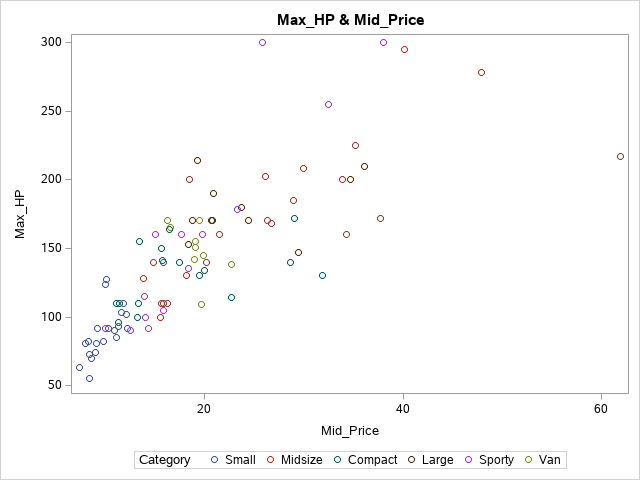
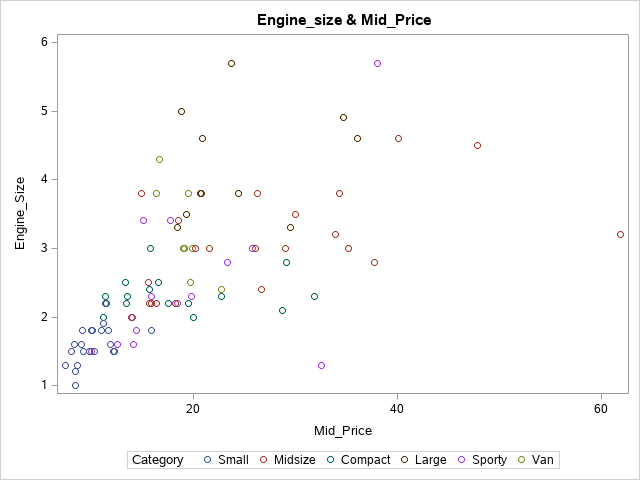
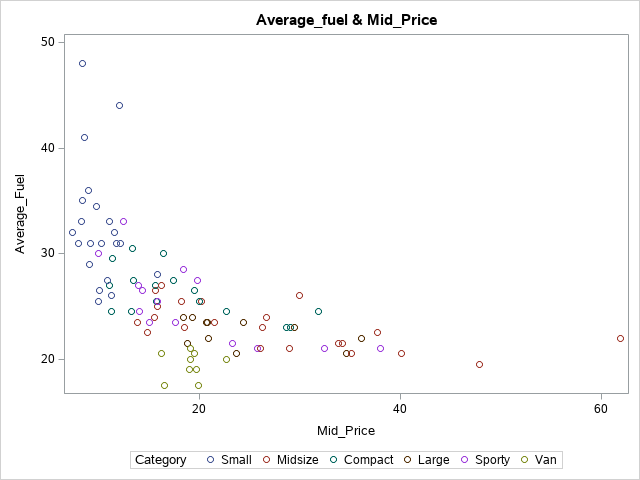

In [15]:
title 'Max_HP & Mid_Price';
proc sgplot 
	data=project.cars_1993;
 	scatter x=Mid_Price y=Max_HP / group=Category;
run;

title 'Engine_size & Mid_Price';
proc sgplot 
	data=project.cars_1993;
 	scatter x=Mid_Price y=Engine_size / group=Category;
run;

title 'Average_fuel & Mid_Price';
proc sgplot 
	data=project.cars_1993;
 	scatter x=Mid_Price y=Average_Fuel / group=Category;
run;

<h3>Variables Correlating with Engine_Size</h3>

<p>Max_HP have a strong positive correlation 0.732
with engine size meaning the bigger the
Engine_size the more likely it has higher
Horsepower.</p>
<p>Average fuel has a moderate negative correlation
-0.679 where bigger engines travel less miles per
gallon.</p>

In [19]:
title 'Variables Correlating with Engine_Size';
proc corr
	data=project.cars_1993 nosimple noprob;
    var Engine_size;
    with Max_HP Average_Fuel;
run;

<p>One vehicle (Mazda RX-7 Sporty) uses different engine technology and that is why it is able to
produce 255 Horsepower with a smaller size engine of 1.3L</p>


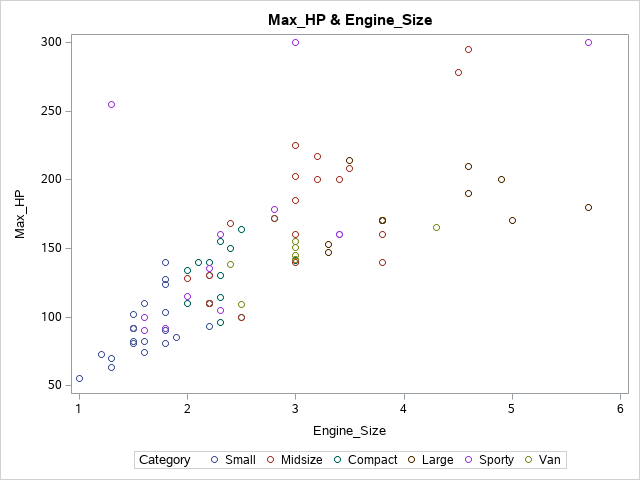
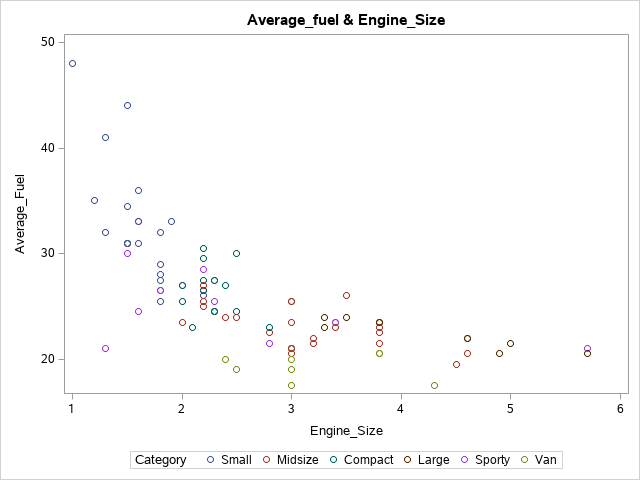

In [20]:
title 'Max_HP & Engine_Size';
proc sgplot 
	data=project.cars_1993;
	scatter x=Engine_size y=Max_HP / group=Category;
run;

title 'Average_fuel & Engine_Size';
proc sgplot
	data=project.cars_1993;
 	scatter x=Engine_size y=Average_Fuel / group=Category;
run;

<h3>Variables correlating with Weight</h3>
<p>There is a strong Negative correlation between
Weight and Average_fuel -0.839 which means
heavier vehicles travel less miles per gallon.</p>


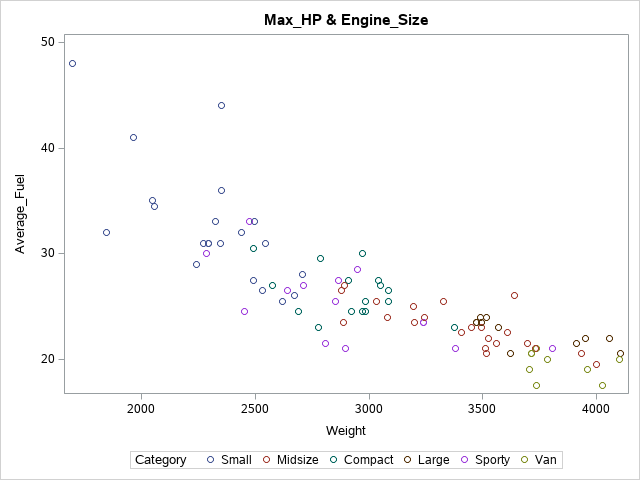

In [21]:
title 'Variables Correlating with Engine_Size';
proc corr
	data=project.cars_1993 nosimple noprob;
    var weight;
    with Average_Fuel;
run;

title 'Max_HP & Engine_Size';
proc sgplot 
	data=project.cars_1993;
	scatter x=Weight y=Average_Fuel / group=Category;
run;